In [37]:
import pandas as pd

data = pd.read_csv('website_traffic.csv')

data.head()

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0


In [22]:
print(data.dtypes)

Page Views            int64
Session Duration    float64
Bounce Rate         float64
Traffic Source       object
Time on Page        float64
Previous Visits       int64
Conversion Rate     float64
Cluster               int32
dtype: object


Calculate Correlations

In [39]:
numeric_data = data.select_dtypes(include=['number'])

correlation_matrix = numeric_data.corr()
conversion_rate_corr = correlation_matrix['Conversion Rate']
print(conversion_rate_corr)

Page Views          0.126635
Session Duration    0.177798
Bounce Rate        -0.049051
Time on Page        0.229669
Previous Visits     0.109496
Conversion Rate     1.000000
Name: Conversion Rate, dtype: float64


Feature Selection

In [38]:
positive_corr_features = conversion_rate_corr[conversion_rate_corr > 0].index.tolist()
positive_corr_features.remove('Conversion Rate')
print(positive_corr_features)

['Page Views', 'Session Duration', 'Time on Page', 'Previous Visits']


In [41]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

numerical_data = data.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

Calculate MAE

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X = data[positive_corr_features]
y = data['Conversion Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.031691679454020995


Determine the optimal number of clusters

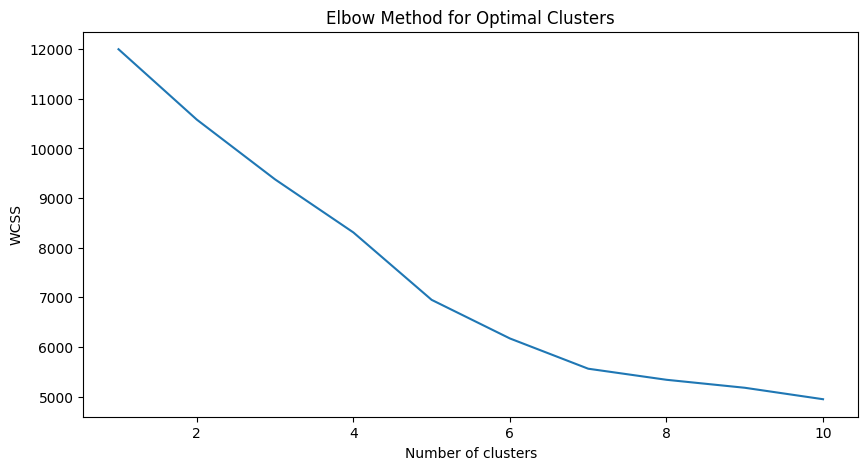

In [43]:
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Clustering

In [44]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(scaled_data)

data['Cluster'] = clusters

Cluster Analysis

In [46]:
cluster_means = data.groupby('Cluster').mean(numeric_only=True)
print(cluster_means)

         Page Views  Session Duration  Bounce Rate  Time on Page  \
Cluster                                                            
0          5.018868          2.146679     0.297996      7.728825   
1          4.981350          1.783461     0.280458      2.495716   
2          4.744186          8.424920     0.278489      3.338442   

         Previous Visits  Conversion Rate  
Cluster                                    
0               1.820755         0.999940  
1               2.126110         0.968205  
2               1.738372         0.999895  


Cluster Visualisation

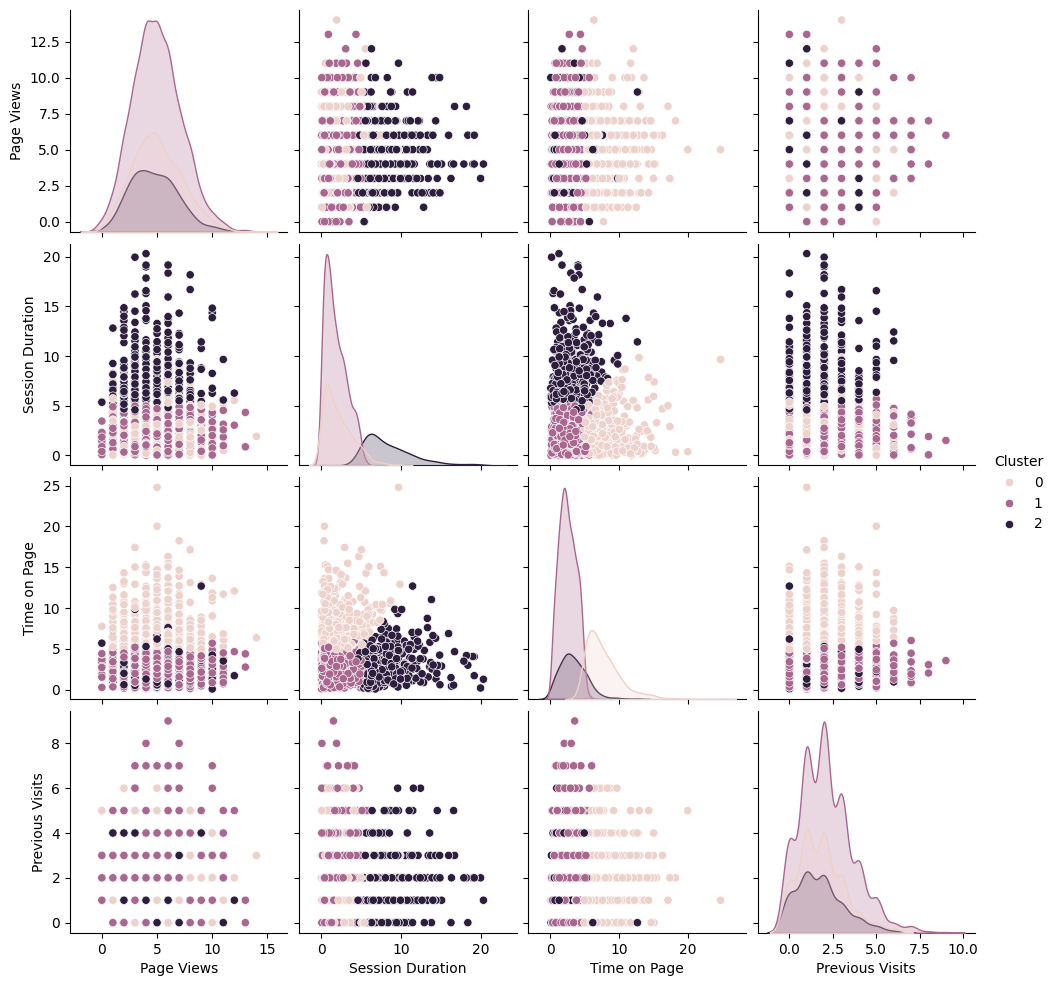

In [47]:
import seaborn as sns

sns.pairplot(data, hue='Cluster', vars=positive_corr_features)
plt.show()

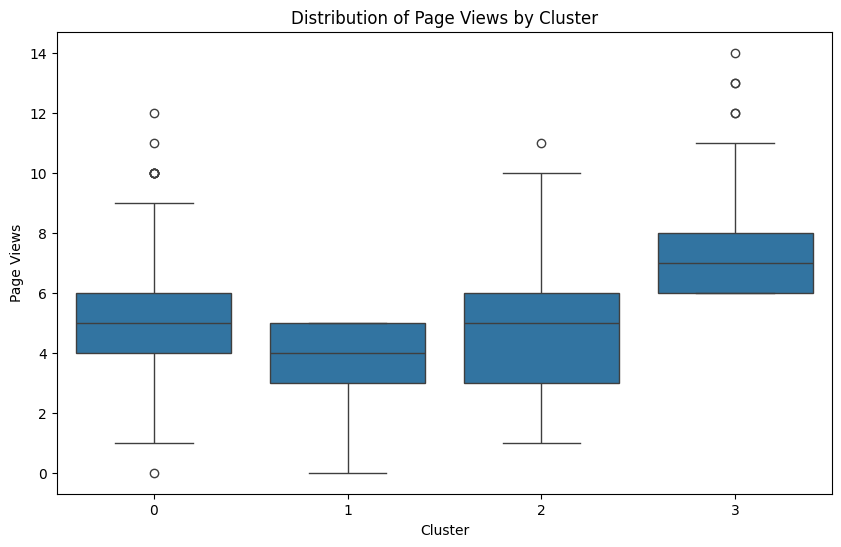

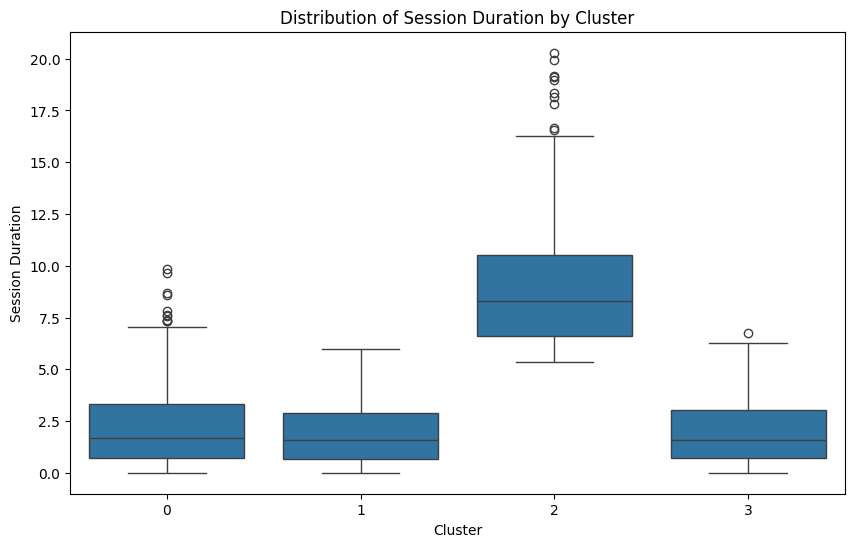

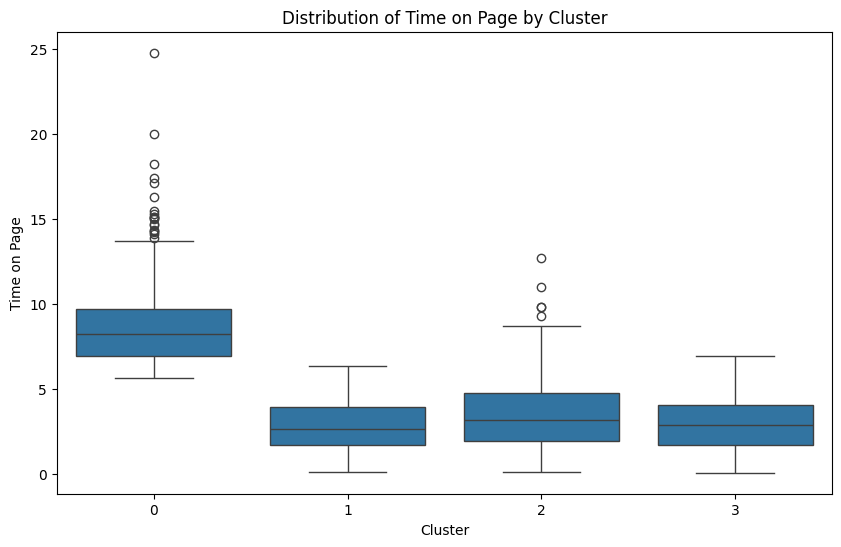

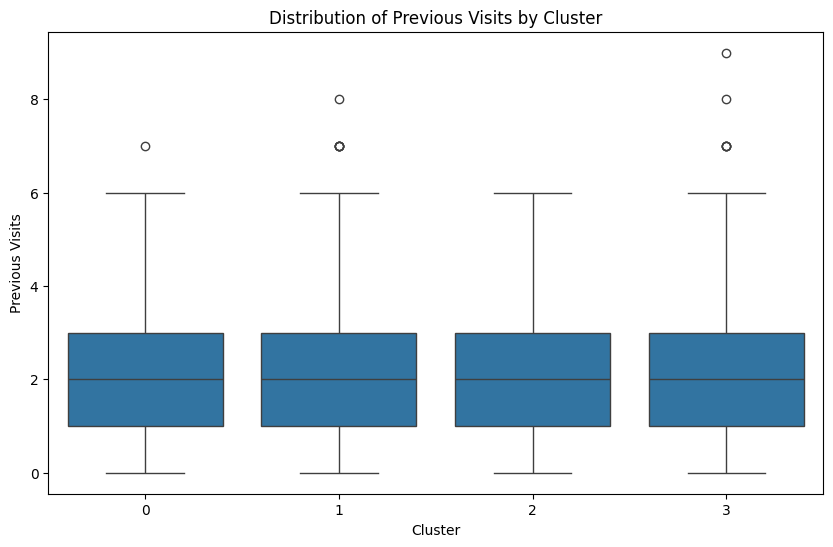

In [52]:
for feature in positive_corr_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=data)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.show()
